## How are in-demand skills trending for Data analytics

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from datasets import load_dataset
# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas() #It stores data as data sets, we converted it to dataframe

#Data Cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)



In [2]:
df_DA_IN=df.loc[(df['job_title']=='Data Analyst')&(df['job_country']=='India')].copy()

In [3]:
df_DA_IN

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
159,Data Analyst,Data Analyst,"Hyderabad, Telangana, India",via LinkedIn,Contractor,False,India,2023-11-28 13:12:07,False,False,India,None,NaN,NaN,Fusion Plus Solutions Inc,[sql],{'programming': ['sql']}
194,Data Analyst,Data Analyst,India,via BeBee India,Full-time,False,India,2023-06-20 13:11:10,False,False,India,None,NaN,NaN,QuEST Global Services Pte. Ltd,"[python, sql, excel, ms access, powerpoint]","{'analyst_tools': ['excel', 'ms access', 'powe..."
504,Data Analyst,Data Analyst,"Hyderabad, Telangana, India",via Shine,Full-time,False,India,2023-11-12 13:08:06,True,False,India,None,NaN,NaN,HSBC,"[sql, nosql, python, r, mysql, sql server, pos...","{'analyst_tools': ['qlik', 'tableau', 'power b..."
691,Data Analyst,Data Analyst,India,via BeBee India,Full-time,False,India,2023-09-12 13:14:38,True,False,India,None,NaN,NaN,AOS,None,None
1399,Data Analyst,Data Analyst,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-07-04 13:13:00,True,False,India,None,NaN,NaN,Infosys BPM,"[sql, shell, r, bigquery, pandas, linux, excel...","{'analyst_tools': ['excel', 'tableau', 'qlik']..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784845,Data Analyst,Data Analyst,"Bengaluru, Karnataka, India",via LinkedIn,Full-time,False,India,2023-01-25 06:14:59,True,False,India,None,NaN,NaN,Capgemini,"[sql, visio]","{'analyst_tools': ['visio'], 'programming': ['..."
785157,Data Analyst,Data Analyst,"Hyderabad, Telangana, India",via LinkedIn,Full-time,False,India,2023-01-31 06:11:12,False,False,India,None,NaN,NaN,ARYAN TECHNOLOGY,"[sql, javascript, sas, sas, excel, spss]","{'analyst_tools': ['sas', 'excel', 'spss'], 'p..."
785515,Data Analyst,Data Analyst,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-09-01 06:17:34,False,False,India,year,105000.0,NaN,Myntra,None,None
785548,Data Analyst,Data Analyst,"Bengaluru, Karnataka, India",via LinkedIn,Full-time,False,India,2023-01-19 06:14:17,False,False,India,None,NaN,NaN,Artech L.L.C.,"[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."


In [31]:
df_DA_IN['job_posted_month_num']=df_DA_IN['job_posted_date'].dt.strftime('%b')

In [32]:
df_DA_IN_pivot=df_DA_IN_explode.pivot_table(index='job_posted_month_num',columns='job_skills',aggfunc='size',fill_value=0)

In [33]:
df_DA_IN_explode=df_DA_IN.explode('job_skills')

In [34]:
df_DA_IN_pivot.loc['Total']=df_DA_IN_pivot.sum()

In [35]:
df_DA_IN_pivot.loc['Total'].sort_values(ascending=False).index

Index(['sql', 'python', 'excel', 'tableau', 'power bi', 'sas', 'r', 'aws',
       'azure', 'javascript',
       ...
       'react.js', 'swift', 'ringcentral', 'suse', 'jupyter', 'sqlite',
       'ggplot2', 'gitlab', 'graphql', 'no-sql'],
      dtype='object', name='job_skills', length=139)

In [36]:
df_DA_IN_pivot=df_DA_IN_pivot[df_DA_IN_pivot.loc['Total'].sort_values(ascending=False).index]



In [37]:
df_DA_IN_pivot=df_DA_IN_pivot.drop('Total')
df_DA_IN_pivot

job_skills,sql,python,excel,tableau,power bi,sas,r,aws,azure,javascript,...,react.js,swift,ringcentral,suse,jupyter,sqlite,ggplot2,gitlab,graphql,no-sql
job_posted_month_num,,,,,,,,,,,,,,,,,,,,,
Apr,56,35,35,27,23,24,16,4,8,7,...,1,0,0,0,0,0,0,1,0,0
Aug,88,58,54,47,43,24,28,20,11,7,...,0,0,0,0,0,0,0,0,0,0
Dec,120,86,78,72,68,44,41,11,13,15,...,0,0,0,0,0,0,0,0,0,0
Feb,64,40,46,32,24,14,23,6,7,8,...,0,0,0,0,0,0,1,0,0,0
Jan,75,55,51,41,26,36,23,6,5,11,...,0,0,0,0,0,0,0,0,1,0
Jul,57,37,37,38,20,20,23,5,8,5,...,0,0,0,0,0,0,0,0,0,0
Jun,50,42,34,29,23,28,23,10,9,5,...,0,0,0,0,0,0,0,0,0,0
Mar,57,25,32,30,19,10,9,7,6,3,...,0,1,0,1,0,0,0,0,0,1
May,44,25,37,24,18,10,9,4,9,3,...,0,0,0,0,0,0,0,0,0,0


In [38]:
DA_totals=df_DA_IN.groupby('job_posted_month_num').size()

In [39]:
df_DA_IN_perc=df_DA_IN_pivot.div(DA_totals/100,axis=0)

In [40]:
df_DA_IN_perc

job_skills,sql,python,excel,tableau,power bi,sas,r,aws,azure,javascript,...,react.js,swift,ringcentral,suse,jupyter,sqlite,ggplot2,gitlab,graphql,no-sql
job_posted_month_num,,,,,,,,,,,,,,,,,,,,,
Apr,56.565657,35.353535,35.353535,27.272727,23.232323,24.242424,16.161616,4.040404,8.080808,7.070707,...,1.010101,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.010101,0.000000,0.000000
Aug,62.411348,41.134752,38.297872,33.333333,30.496454,17.021277,19.858156,14.184397,7.801418,4.964539,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Dec,61.538462,44.102564,40.000000,36.923077,34.871795,22.564103,21.025641,5.641026,6.666667,7.692308,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Feb,54.237288,33.898305,38.983051,27.118644,20.338983,11.864407,19.491525,5.084746,5.932203,6.779661,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.847458,0.000000,0.000000,0.000000
Jan,52.083333,38.194444,35.416667,28.472222,18.055556,25.000000,15.972222,4.166667,3.472222,7.638889,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.694444,0.000000
Jul,61.956522,40.217391,40.217391,41.304348,21.739130,21.739130,25.000000,5.434783,8.695652,5.434783,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,53.763441,45.161290,36.559140,31.182796,24.731183,30.107527,24.731183,10.752688,9.677419,5.376344,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,58.762887,25.773196,32.989691,30.927835,19.587629,10.309278,9.278351,7.216495,6.185567,3.092784,...,0.000000,1.030928,0.000000,1.030928,0.00000,0.000000,0.000000,0.000000,0.000000,1.030928
May,68.750000,39.062500,57.812500,37.500000,28.125000,15.625000,14.062500,6.250000,14.062500,4.687500,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


In [43]:
df_plot=df_DA_IN_perc.iloc[:,:5]

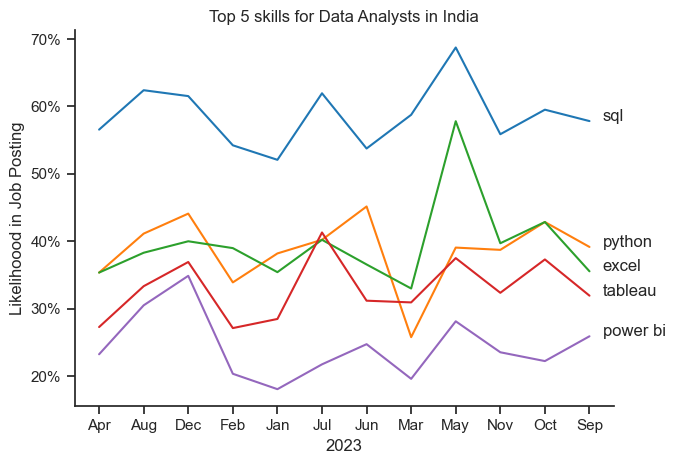

In [53]:
from matplotlib.ticker import PercentFormatter

sns.lineplot(data=df_plot,dashes=False,palette='tab10',legend=False)
sns.set_theme(style='ticks')
sns.despine()

plt.title('Top 5 skills for Data Analysts in India')
plt.ylabel('Likelihoood in Job Posting')
plt.xlabel('2023')

ax=plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.tight_layout()

for i in range(5):
    plt.text(11.3,df_plot.iloc[-1,i],df_plot.columns[i])
